In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


* Species : 펭귄 종
* island : 섬(서식지)
* sex : 성별
* bill_length_mm : 부리의 길이
* bill_depth_mm : 부리의 높이
* flipper_length_mm : 팔 길이
* body_mass_g : 체중(g)

# 데이터 로드

## 필요 라이브러리 및 데이터 로드

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
X_train = pd.read_csv("/content/drive/Shareddrives/2022 KHU Summer Workshop/EDA & Machine Learning basic/Dataset/penguin_X_train.csv")
X_test = pd.read_csv("/content/drive/Shareddrives/2022 KHU Summer Workshop/EDA & Machine Learning basic/Dataset/penguin_X_test.csv")
y_train = pd.read_csv("/content/drive/Shareddrives/2022 KHU Summer Workshop/EDA & Machine Learning basic/Dataset/penguin_y_train.csv")

## 정보 확인

In [ ]:
print(X_train.info())
print(' ')
print(X_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            240 non-null    object 
 1   island             240 non-null    object 
 2   sex                232 non-null    object 
 3   bill_length_mm     238 non-null    float64
 4   bill_depth_mm      238 non-null    float64
 5   flipper_length_mm  238 non-null    float64
dtypes: float64(3), object(3)
memory usage: 11.4+ KB
None
 
       bill_length_mm  bill_depth_mm  flipper_length_mm
count      238.000000     238.000000         238.000000
mean        43.948739      17.205462         200.684874
std          5.475004       1.973498          14.110080
min         32.100000      13.200000         172.000000
25%         39.200000      15.700000         190.000000
50%         44.700000      17.300000         197.000000
75%         48.700000      18.700000         213.000000
max 

In [ ]:
categoric_ = X_train.select_dtypes(include = ['object']).columns.tolist()
numeric_ = X_train.select_dtypes(exclude = ['object']).columns.tolist()

In [ ]:
for col in X_train.columns:
  print(' ')
  print(col)
  print(X_train[X_train[col].isnull()])
  # print(X_train[X_train[col].isnull()].index)

 
species
Empty DataFrame
Columns: [species, island, sex, bill_length_mm, bill_depth_mm, flipper_length_mm]
Index: []
 
island
Empty DataFrame
Columns: [species, island, sex, bill_length_mm, bill_depth_mm, flipper_length_mm]
Index: []
 
sex
    species     island  sex  bill_length_mm  bill_depth_mm  flipper_length_mm
0    Adelie  Torgersen  NaN            42.0           20.2              190.0
6    Gentoo     Biscoe  NaN            44.5           14.3              216.0
43   Gentoo     Biscoe  NaN             NaN            NaN                NaN
66   Adelie  Torgersen  NaN            37.8           17.3              180.0
88   Gentoo     Biscoe  NaN            47.3           13.8              216.0
89   Adelie  Torgersen  NaN            37.8           17.1              186.0
110  Gentoo     Biscoe  NaN            44.5           15.7              217.0
229  Adelie  Torgersen  NaN             NaN            NaN                NaN
 
bill_length_mm
    species     island  sex  bill_length

# 데이터 전처리

## 결측치 처리

### 대치



In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
X_train[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']] = imputer.fit_transform(X_train[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']])
X_test[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']] = imputer.fit_transform(X_test[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']])
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            240 non-null    object 
 1   island             240 non-null    object 
 2   sex                232 non-null    object 
 3   bill_length_mm     240 non-null    float64
 4   bill_depth_mm      240 non-null    float64
 5   flipper_length_mm  240 non-null    float64
dtypes: float64(3), object(3)
memory usage: 11.4+ KB
None


In [ ]:
X_train.loc[[0, 6, 43, 66, 88, 89, 110, 229]]

,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,Torgersen,NaN,42.000000,20.200000,190.000000
6,Gentoo,Biscoe,NaN,44.500000,14.300000,216.000000
43,Gentoo,Biscoe,NaN,43.948739,17.205462,200.684874
66,Adelie,Torgersen,NaN,37.800000,17.300000,180.000000
88,Gentoo,Biscoe,NaN,47.300000,13.800000,216.000000
89,Adelie,Torgersen,NaN,37.800000,17.100000,186.000000
110,Gentoo,Biscoe,NaN,44.500000,15.700000,217.000000
229,Adelie,Torgersen,NaN,43.948739,17.205462,200.684874


### 제거

In [ ]:
train = pd.concat([X_train, y_train], axis=1)

train.dropna(inplace=True) # 결측치 제거
train.reset_index(drop=True, inplace=True)

## Assumption : Multicolinearity

### 상관관계계 확인

In [ ]:
train = pd.get_dummies(train)
y_train = train['body_mass_g']
del train['body_mass_g']
X_train = train

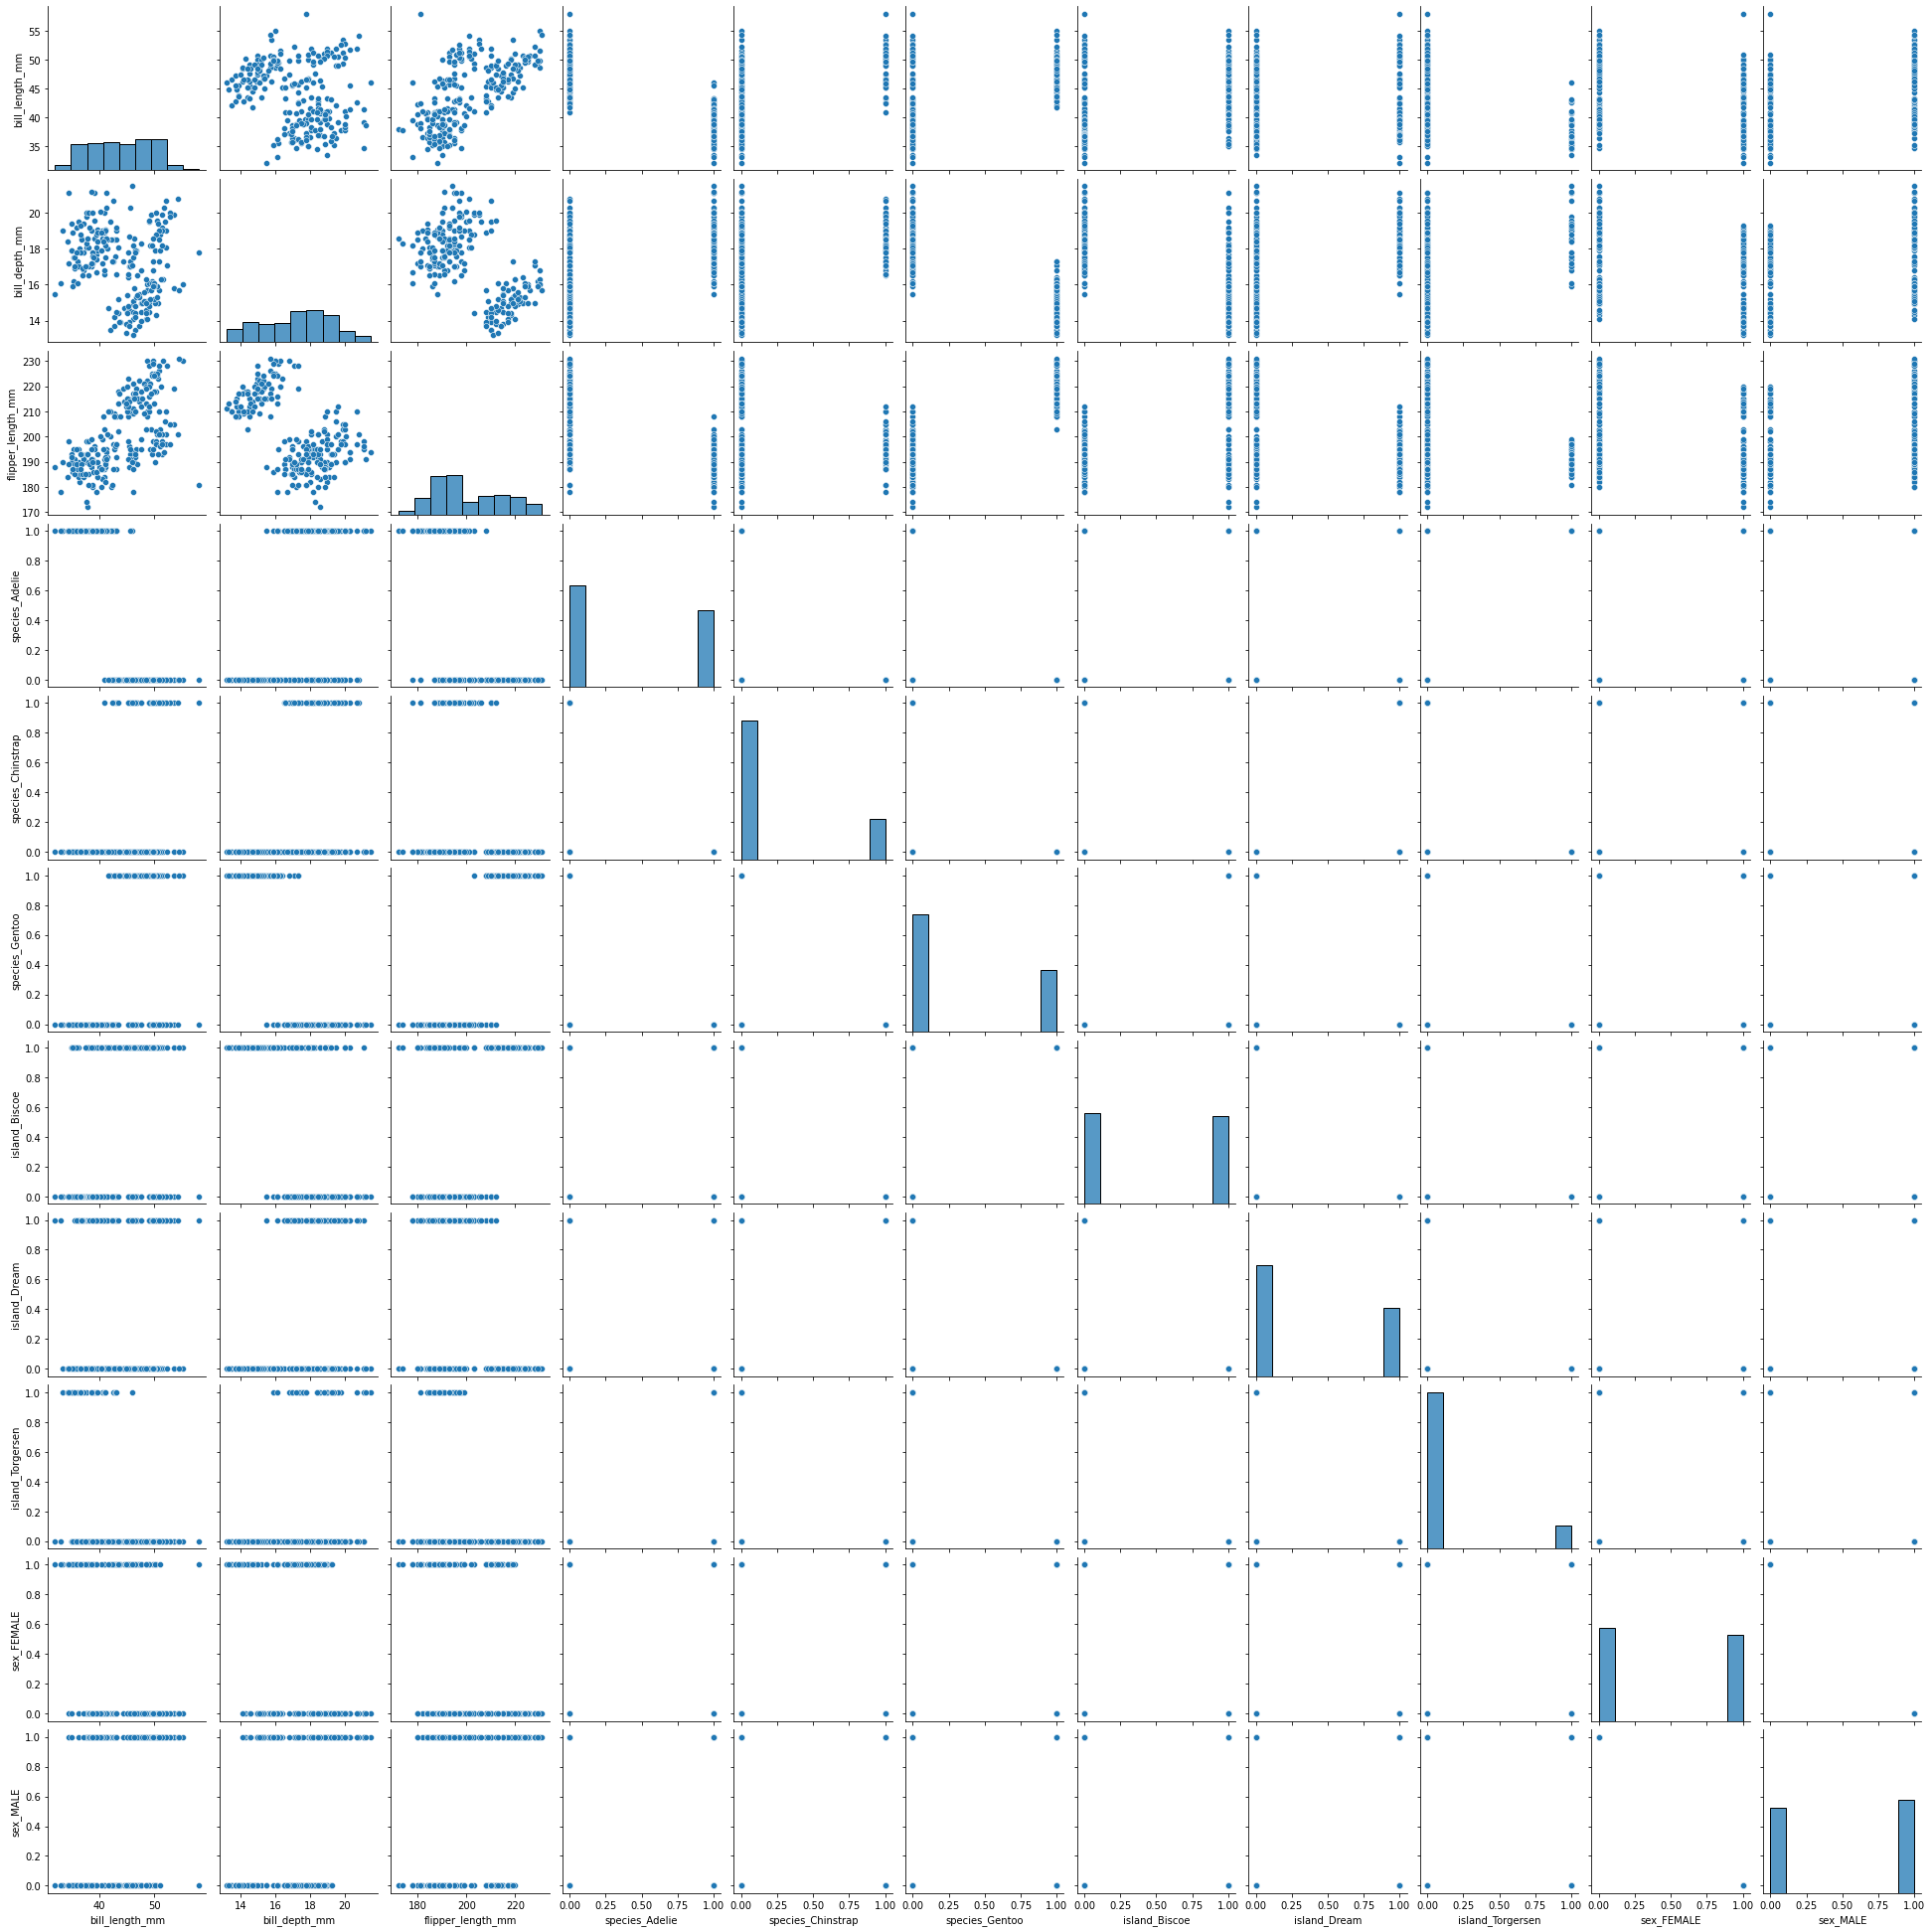

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
bill_length_mm,1.000000,-0.213403,0.639013,-0.848078,0.472023,0.469473,0.180397,0.085792,-0.392835,-0.347001,0.347001
bill_depth_mm,-0.213403,1.000000,-0.565518,0.502007,0.333389,-0.815532,-0.603392,0.441288,0.260865,-0.365399,0.365399
flipper_length_mm,0.639013,-0.565518,1.000000,-0.681049,-0.176333,0.864280,0.569127,-0.401274,-0.267676,-0.282581,0.282581
species_Adelie,-0.848078,0.502007,-0.681049,1.000000,-0.467820,-0.631446,-0.263557,-0.034639,0.442764,0.020128,-0.020128
species_Chinstrap,0.472023,0.333389,-0.176333,-0.467820,1.000000,-0.389932,-0.528295,0.687552,-0.207134,0.023189,-0.023189
species_Gentoo,0.469473,-0.815532,0.864280,-0.631446,-0.389932,1.000000,0.738094,-0.567131,-0.279581,-0.041315,0.041315
island_Biscoe,0.180397,-0.603392,0.569127,-0.263557,-0.528295,0.738094,1.000000,-0.768372,-0.378788,-0.026634,0.026634
island_Dream,0.085792,0.441288,-0.401274,-0.034639,0.687552,-0.567131,-0.768372,1.000000,-0.301262,-0.001840,0.001840
island_Torgersen,-0.392835,0.260865,-0.267676,0.442764,-0.207134,-0.279581,-0.378788,-0.301262,1.000000,0.042342,-0.042342
sex_FEMALE,-0.347001,-0.365399,-0.282581,0.020128,0.023189,-0.041315,-0.026634,-0.001840,0.042342,1.000000,-1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(X_train[numeric_], kind="scatter")
plt.show()
X_train[numeric_].corr()

### VIF
다중 공선성을 없애는 가장 기본적인 방법은 다른 독립변수에 의존하는 변수를 없애는 것이다. 가장 의존적인 독립변수를 선택하는 방법으로는 VIF(Variance Inflation Factor)를 사용할 수 있다. VIF는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것이다. 𝑖
번째 변수의 VIF는 다음과 같이 계산한다.

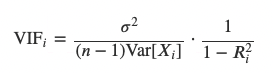

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train[numeric_].values, i) for i in range(X_train[numeric_].shape[1])]
vif["features"] = X_train[numeric_].columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,6.470490,bill_length_mm
1,6.237932,bill_depth_mm
2,6.754338,flipper_length_mm
3,inf,species_Adelie
4,inf,species_Chinstrap
5,inf,species_Gentoo
6,inf,island_Biscoe
7,inf,island_Dream
8,inf,island_Torgersen
9,inf,sex_FEMALE


# 학습 및 검증 데이터 분할, 스케일링



## 학습 및 검증 데이터 분할 

In [ ]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state = 42)

## 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numeric_ = ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm']
scaler = MinMaxScaler()
# scaler = StandardScaler()

X_tr[numeric_] = scaler.fit_transform(X_tr[numeric_])
X_val[numeric_] = scaler.transform(X_val[numeric_])

# 학습 및 평가

## 모델 정의 및 훈련

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, mean_squared_error

model_xgb = XGBRegressor(random_state = 42, n_estimators=100, max_depth = 2)
model_lgbm = LGBMRegressor(random_state = 42, n_estimators=100, max_depth = 2)
model_rf = RandomForestRegressor(random_state = 42, n_estimators=100, max_depth = 2)
model_lr = LinearRegression()

model_xgb.fit(X_tr,y_tr)
model_lgbm.fit(X_tr,y_tr)
model_rf.fit(X_tr,y_tr)
model_lr.fit(X_tr,y_tr)

[03:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


LinearRegression()

## 모델 검증

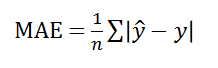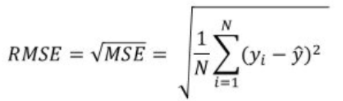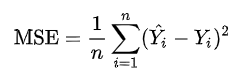

MAE
*   모델의 예측값과 실제값의 차이를 절대값으로 변환하여 평균한 것
*   항목 추가
*   Error에 절대값을 취하기 때문에 에러의 크기가 그대로 반영
*   에러에 따른 손실이 선형적으로 올라갈 때 적합

MSE(평균 제곱 오차)
*   회귀에서 자주 사용되는 손실함수
*   손실(잔차)는 작을수록 좋기 때문에 수치가 작을수록 모델의 정확도가 높음
*   예측 변수와 단위가 다르며 잔차를 제곱하기 때문에 실제 오류보다 더 커지는 경향이 있고, 아웃라이어에도 민감하다.
*   에러에 제곱을 하기 때문에 에러가 클수록 그에 따른 가중치가 크게 반영됨.

RMSE(평균 제곱근 오차)
*   RMSE는 MSE에 루트를 씌운 값으로 예측 변수와 단위가 같다.
*   MSE가 오류의 제곱을 구하기 때문에 실제 오류 평균보다 커지는 특성이 있어 이를 보완하기 위해 루트를 씌우는 것
*   에러에 따른 손실이 기하 급수적으로 올라가는 상황에서 쓰기 적합함.

R2, RMSLE, MAPE, MAE 등등…


In [ ]:
pred_xgb = model_xgb.predict(X_val)
pred_lgbm = model_lgbm.predict(X_val)
pred_rf = model_rf.predict(X_val)
pred_lr = model_lr.predict(X_val)


mse_xgb = mean_squared_error(y_val, pred_xgb, squared=True)
mse_lgbm = mean_squared_error(y_val, pred_lgbm, squared=True)
mse_rf = mean_squared_error(y_val, pred_rf, squared=True)
mse_lr = mean_squared_error(y_val, pred_lr, squared=True)

rmse_xgb = mean_squared_error(y_val, pred_xgb, squared=False)
rmse_lgbm = mean_squared_error(y_val, pred_lgbm, squared=False)
rmse_rf = mean_squared_error(y_val, pred_rf, squared=False)
rmse_lr = mean_squared_error(y_val, pred_lr, squared=False)
print('*'*30)
print('MSE : {0:4f} {1:4f} {2:4f} {3:4f}'.format(mse_xgb, mse_lgbm, mse_rf, mse_lr))
print('RMSE : {0:4f} {1:4f} {2:4f} {3:4f}'.format(rmse_xgb, rmse_lgbm, rmse_rf, rmse_lr))

******************************
MSE : 91836.523743 89797.683702 86728.479312 85335.192478
RMSE : 303.045415 299.662616 294.496994 292.121879


# Regression Model Validation

## Assumption : Normality of Residuals

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Check for Multivariate Normality: \nQ-Q Plot')

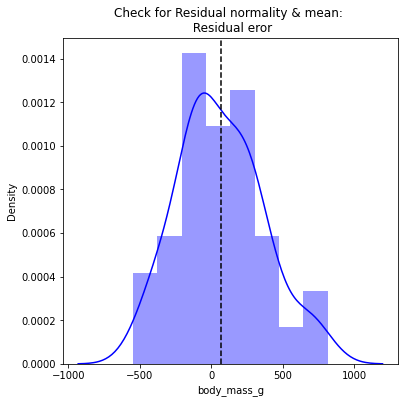

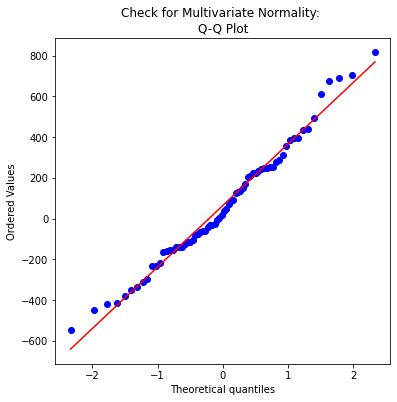

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot 

plt.figure(figsize=(6,6))
sns.distplot((y_val - pred_xgb),color='b')
plt.axvline((y_val - pred_xgb).mean(),color='k',linestyle='--')
plt.title('Check for Residual normality & mean: \n Residual eror');


plt.figure(figsize=(6,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_val - pred_xgb),plot=plt, fit=True)
plt.title('Check for Multivariate Normality: \nQ-Q Plot')

## Assumption : Homoscedastic

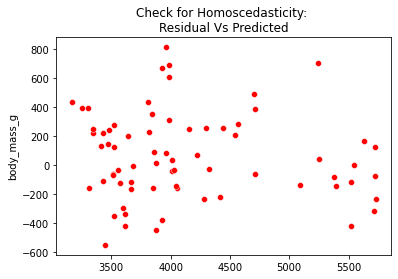

In [ ]:
#Check for Homoscedasticity
sns.scatterplot(y = (y_val - pred_xgb), x= pred_xgb, color='r') 
plt.title('Check for Homoscedasticity: \nResidual Vs Predicted');

### F test Hypothesis

* Null Hypothesis : Residuals are homoscedasticity
* Alternate hypothesis: Residuals are heteroscedasticity

In [ ]:
# White test
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
result = het_white(y_val - pred_xgb, X_val)
lzip(keys, result)

[('Lagrange Multiplier statistic:', 31.118143639091823),
 ("LM test's p-value:", 0.5610471725409708),
 ('F-statistic:', 0.8730824339506218),
 ("F-test's p-value:", 0.6516768489426763)]